<a href="https://colab.research.google.com/github/muhammadhaerul25/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:**
- Entropy -> 0 = data homogen (100:0)
- Entropy -> 1 = data balance (50:50)
- Tujuan: u/ membuat entropy semakin rendah



**Quiz:**
- Overfitting and underfitting
- Oversampling and undersampling

In [43]:
import pandas as pd
df = pd.read_csv('/content/decisiontree_ch6.csv')
df.head()

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus


In [44]:
df.describe()

,ID,bangku
count,40.000000,40.000000
mean,20.500000,5.300000
std,11.690452,2.015326
min,1.000000,2.000000
25%,10.750000,4.000000
50%,20.500000,4.500000
75%,30.250000,8.000000
max,40.000000,8.000000


In [45]:
df['mesin'].value_counts()

bensin    25
diesel    15
Name: mesin, dtype: int64

In [46]:
bensin_sedan = 0
bensin_minibus = 0
for mesin in df['mesin'].unique():
  if mesin == 'bensin':
    for label in df['label']:
      if label == 'sedan':
        bensin_sedan += 1
      if label == 'minibus':
        bensin_minibus += 1
print('bensin_sedan =', bensin_sedan)
print('bensin_minibus =', bensin_minibus)

bensin_sedan = 17
bensin_minibus = 23


In [47]:
df.dtypes

ID            int64
mesin        object
bangku        int64
penggerak    object
label        object
dtype: object

In [48]:
encoding = {'mesin': {'bensin':0, 'diesel':1},
            'penggerak': {'depan':0, 'belakang': 1}}
df.replace(encoding, inplace=True)

In [49]:
df.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [50]:
df.dtypes

ID            int64
mesin         int64
bangku        int64
penggerak     int64
label        object
dtype: object

In [53]:
X = df.drop(['ID', 'label'], axis=1)
y = df['label']

##**Model Building**

In [122]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.4, random_state=0)

In [123]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [124]:
y_predict = model.predict(X_test)
print(y_predict)
print(len(y_predict))

['minibus' 'sedan' 'sedan' 'minibus' 'sedan' 'sedan' 'minibus' 'minibus'
 'minibus' 'sedan' 'sedan' 'minibus' 'sedan' 'minibus' 'sedan' 'sedan']
16


In [125]:
print(list(y_test))
print(y_predict)

['minibus', 'sedan', 'minibus', 'minibus', 'sedan', 'sedan', 'minibus', 'minibus', 'minibus', 'sedan', 'sedan', 'minibus', 'sedan', 'minibus', 'sedan', 'sedan']
['minibus' 'sedan' 'sedan' 'minibus' 'sedan' 'sedan' 'minibus' 'minibus'
 'minibus' 'sedan' 'sedan' 'minibus' 'sedan' 'minibus' 'sedan' 'sedan']


In [126]:
import sklearn.metrics as met
print(met.accuracy_score(y_test, y_predict)*100, "%")

93.75 %


##**Data Visualisation**

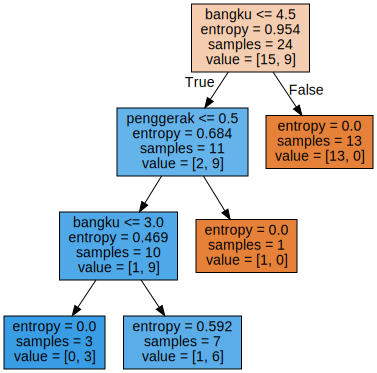

In [127]:
import graphviz
from sklearn import tree

#DOT data
dot_data = tree.export_graphviz(model, out_file=None, feature_names=['mesin', 'bangku', 'penggerak'], filled=True)

#Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph